p* = 0.355299


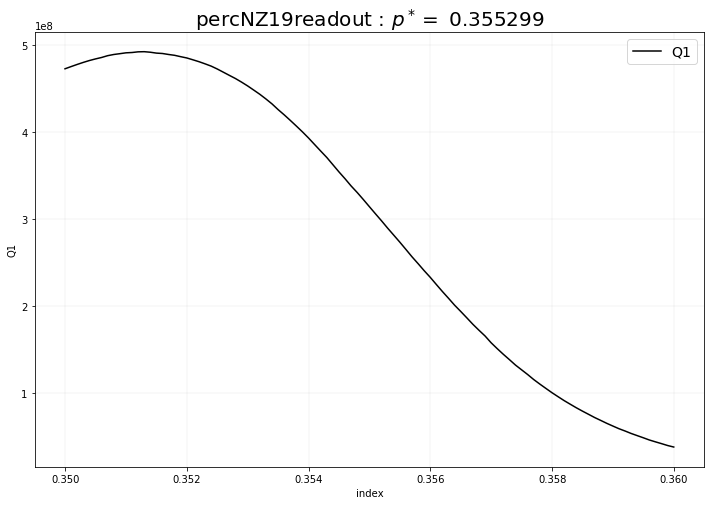

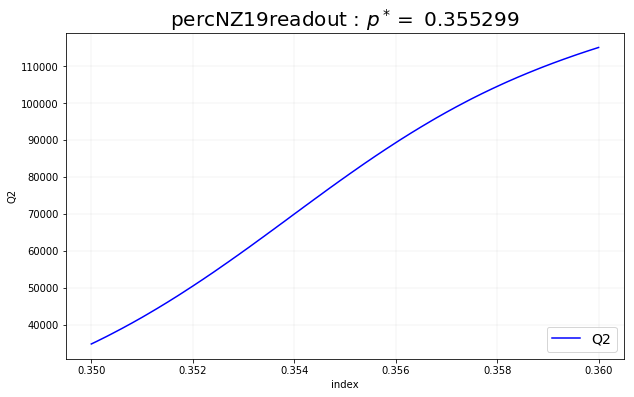

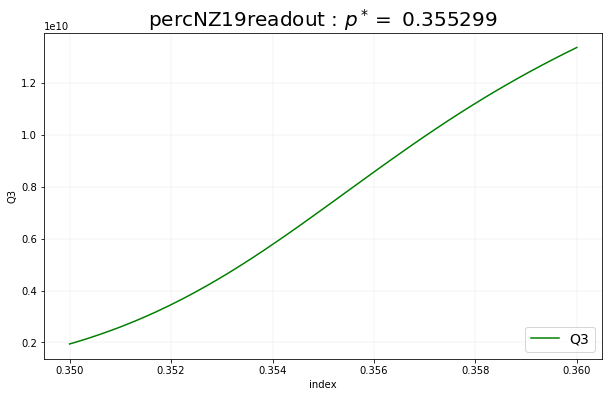

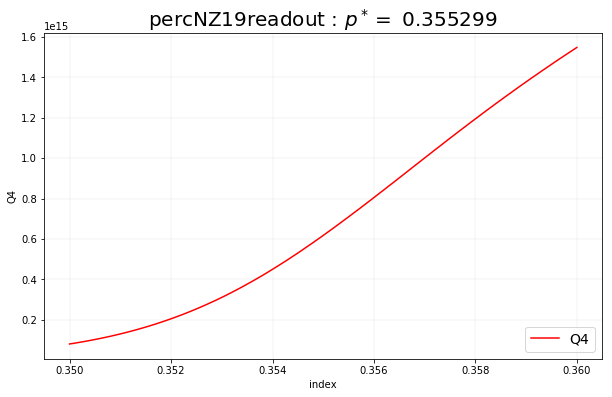

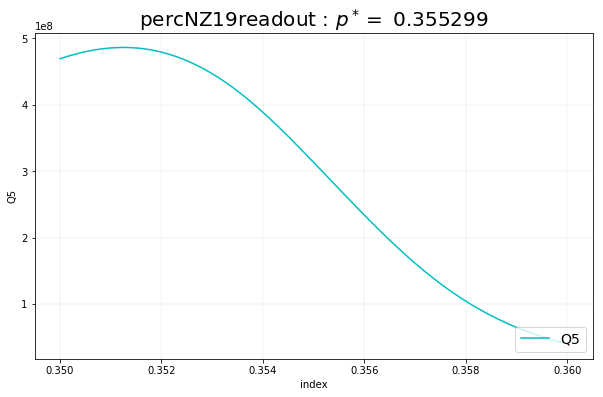

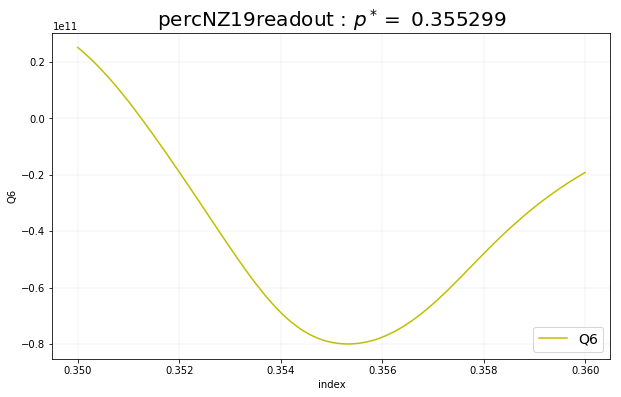

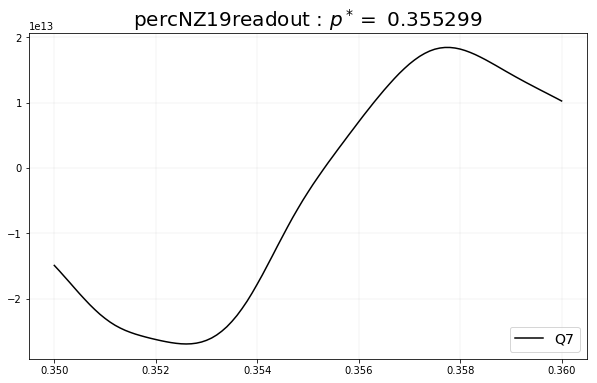

In [3]:
import stoat_tools as st
import numpy as np
import matplotlib.pyplot as plt

file = 'percNZ19readout'

width = 256
height = 8

N = height*width**2

# PP(datafile, num plottables, size of system, plot? default True, convoluted datafile? default true)
st.PP(file,7, N)

In [2]:
r = [0.355299,.] 
s = np.std(r)
avg = round(np.average(r),8)
print(avg)
error = s/np.sqrt(len(r))
print(round(error, 8))

SyntaxError: invalid syntax (<ipython-input-2-6ae34d55cbaa>, line 1)

In [ ]:
# p* = p_c + a*L^(-1/nu)

# site per 3
#---------------------------------------------------------
err_w1 = 0.0001079

err_w2 = 0.000032

err_w3 = 0.00002


p_w1 = 0.

p_w2 = 0.

p_w3 = 0.36229858

p_obs = [p_w1, p_w2, p_w3]
err = [err_w1, err_w2, err_w3]

avg_err = round(np.average(err),5)

L = [64, 128, 256]
nu = 4/3
L_nu = [L[i]**(-1/nu) for i in range(0, len(L))]

fig, ax = plt.subplots()
ax.errorbar(L_nu, p_obs, yerr = err)

#plt.plot(L_nu, p_obs)

a = np.polyfit(L_nu, p_obs, 1)

p_c = round(a[-1], 5)
plt.title('Extrapolation of Infinite Cubic Lattice', fontsize = 20)
plt.xlabel('$L^{-1/\\nu}$', fontsize=20)
plt.ylabel('$p^*$', fontsize=20)
plt.gcf().set_size_inches(12, 8)
print('p_c = ' + str(p_c) + ' +- ' + str(avg_err))

Respective differences in data from fit
Periodic:  0.0656761
Open      0.0394429


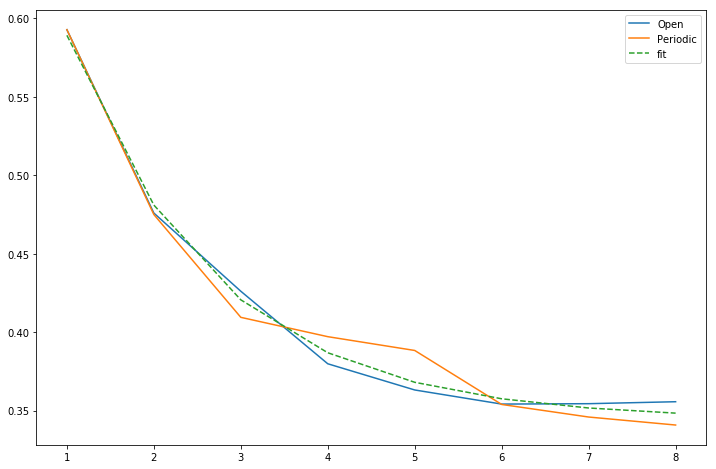

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def test(x, a, b, c):
    return a*np.exp(-b*x)+c

per = [.592746, .47497, .40947, .39715, .38836, .35396, .34595, .34085]
op = [.592746, .47592, .42610, .37988, .36319, .35420, .35445, .35570]
h = [1, 2, 3, 4, 5, 6, 7, 8]

perr = .0000212
operr = .0000250;
plt.plot(h, op, label='Open');

plt.plot(h, per, label='Periodic');

params, pco = optimize.curve_fit(test, h, op)
a,b,c = params
d = 0
for i in range(0,len(per)):
    d+= abs(test(h[i],a,b,c)-per[i])
print("Respective differences in data from fit")
print("Periodic: ", round(d, 7))
d = 0
params, pco = optimize.curve_fit(test, h, per)
a,b,c = params
for i in range(0, len(op)):
    d+= abs(test(h[i],a,b,c)-op[i])
print("Open     " ,round(d, 7))
nice = [a*np.exp(-b*i)+c for i in h]
plt.plot(h, nice, '--', label='fit');
plt.legend();
plt.gcf().set_size_inches(12, 8)
